In [58]:
import sys
import os
import pandas as pd
import numpy as np
from importlib import reload

# spatial analysis
from pointpats import centrography
from pygam import LinearGAM, s, f

# plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# local import
sys.path.append("../")
from utils.trackmate import dataEngineering as _tm
from utils.visualization import generalPlots as _plot
from utils.trackmate import spatialAnalysis as _stat

In [2]:
reload(_tm)
ROOT_DIR = "/nfs/turbo/umms-indikar/shared/projects/live_cell_imaging/2021-05-12-BJ-PF-H2B-4OHT-AfterSort/test/scene_test/"

data = _tm.load_trackmate_dir(ROOT_DIR)
df = _tm.merge_tracks_and_all(data)

df = _tm.clean_up_trackSpots(df)
df.head()

All shape: (494833, 31)
Links shape: (445654, 16)
Track shape: (27648, 45)
Spots shape: (473302, 31)
merged shape: (473302, 75)
cleaned shape (473302, 66)


,Label_x,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY,STEP,NORMED_STEP,MEAN_INTENSITY01_SCALED,MEAN_INTENSITY02_SCALED,MEAN_INTENSITY03_SCALED,MEAN_INTENSITY_SCALED
0,ID40960,40960,0,0.015,3174.383,2165.295,0,0,0,6.5,...,0.016,0.006,0.012,0.003,0,0.000000,0.428571,0.963636,0.18750,0.963636
3215,ID59143,59143,0,0.014,3167.023,2162.450,0,1,1,6.5,...,0.016,0.006,0.012,0.003,1,0.041667,0.333333,0.872727,0.56250,0.872727
4867,ID33628,33628,0,0.012,3158.284,2162.444,0,2,2,6.5,...,0.016,0.006,0.012,0.003,2,0.083333,0.238095,0.563636,0.65625,0.563636
8720,ID44539,44539,0,0.016,3156.800,2163.860,0,3,3,6.5,...,0.016,0.006,0.012,0.003,3,0.125000,0.142857,1.000000,0.75000,1.000000
10888,ID7707,7707,0,0.013,3158.090,2164.785,0,4,4,6.5,...,0.016,0.006,0.012,0.003,4,0.166667,0.619048,0.745455,0.28125,0.745455


In [3]:
FRAME_SIZE = (652 * 6, 472 * 5)
FRAME_SIZE

(3912, 2360)

Text(0.5, 1.01, 'Detected Cell Positions Frame: 100')

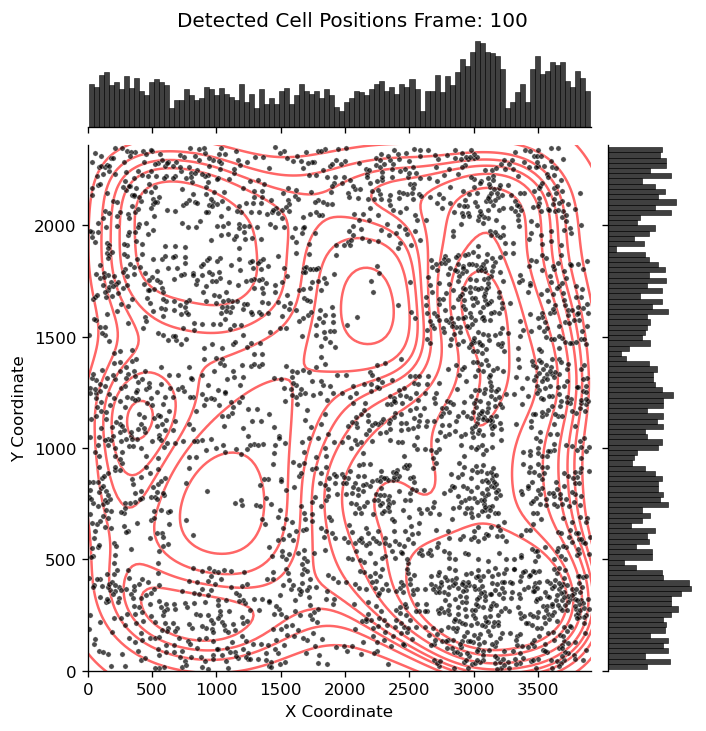

In [55]:
%matplotlib inline 
"""
test initial frame
"""
reload(_plot)

FRAME_N = 100
frame = df[df['FRAME'] == FRAME_N]

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (7, 3)

_plot.joint_plot(frame, FRAME_SIZE)
plt.suptitle(f"Detected Cell Positions Frame: {FRAME_N}", y=1.01)


Text(0.5, 0.8, 'Cell Density and Dispersion Frame: 175')

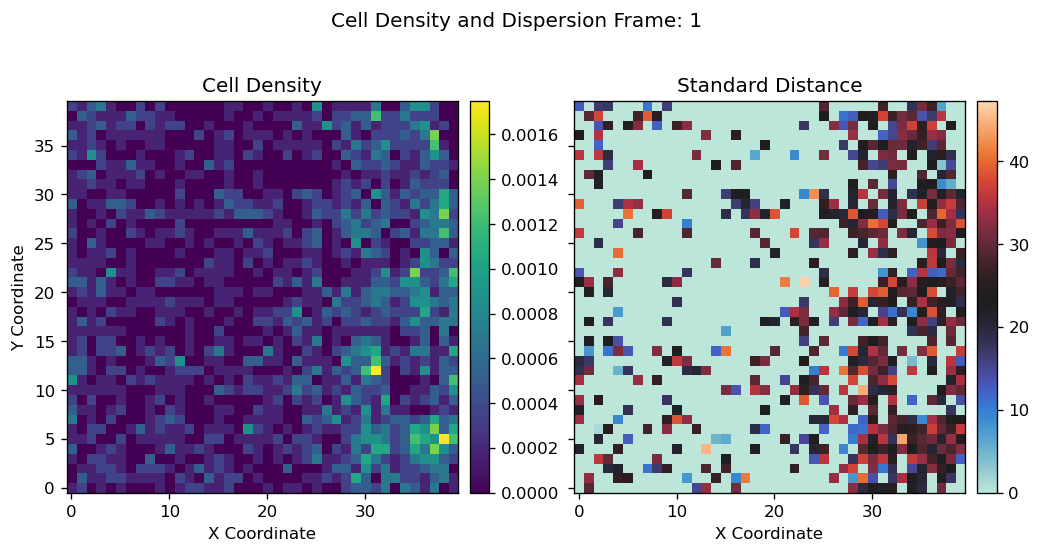

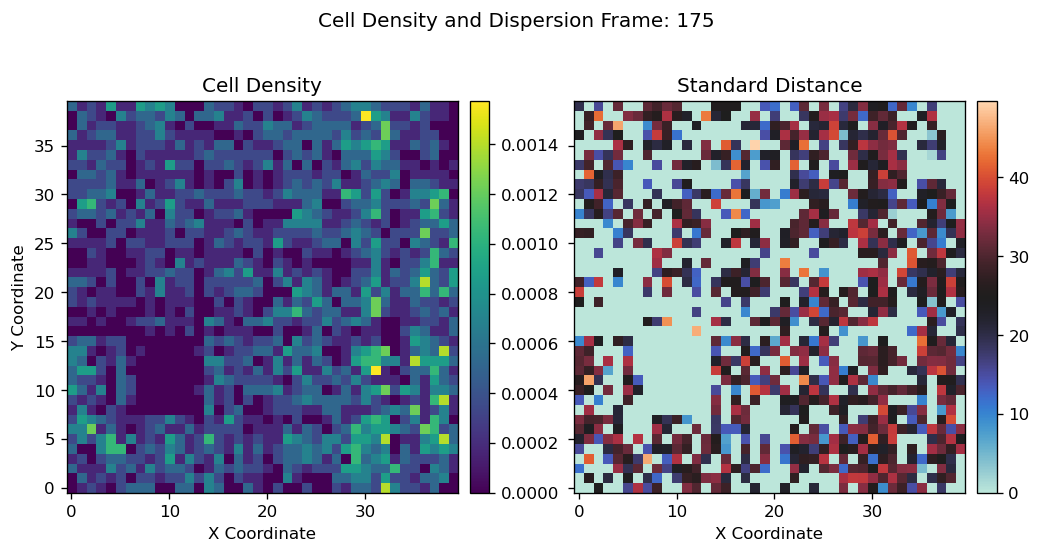

In [30]:
reload(_stat)    
    
######################################################################
# START TIME
######################################################################
    
SIZE = 40
FRAME_N = 1
frame = df[df['FRAME'] == FRAME_N]
    
dens, mu = _stat.get_densities(points=frame[['POSITION_X', 'POSITION_Y']], 
                       frame_size=FRAME_SIZE, 
                       subregion_div=(SIZE, SIZE))


matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im1=ax1.imshow(dens, interpolation='nearest', cmap='viridis', origin='lower')
ax1.set_title("Cell Density")
ax1.set_ylabel("Y Coordinate")
ax1.set_xlabel("X Coordinate")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2=ax2.imshow(mu, interpolation='nearest', cmap='icefire', origin='lower')
ax2.set_title("Standard Distance")
ax2.set_xlabel("X Coordinate")

plt.suptitle(f"Cell Density and Dispersion Frame: {FRAME_N}", y=0.8)
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)


######################################################################
# END TIME
######################################################################


SIZE = 40
FRAME_N = 175
frame = df[df['FRAME'] == FRAME_N]
    
dens, mu = _stat.get_densities(points=frame[['POSITION_X', 'POSITION_Y']], 
                       frame_size=FRAME_SIZE, 
                       subregion_div=(SIZE, SIZE))


matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im1 = ax1.imshow(dens, interpolation='nearest', cmap='viridis', origin='lower')
ax1.set_title("Cell Density")
ax1.set_ylabel("Y Coordinate")
ax1.set_xlabel("X Coordinate")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2=ax2.imshow(mu, interpolation='nearest', cmap='icefire', origin='lower')
ax2.set_title("Standard Distance")
ax2.set_xlabel("X Coordinate")
divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

plt.suptitle(f"Cell Density and Dispersion Frame: {FRAME_N}", y=0.8)

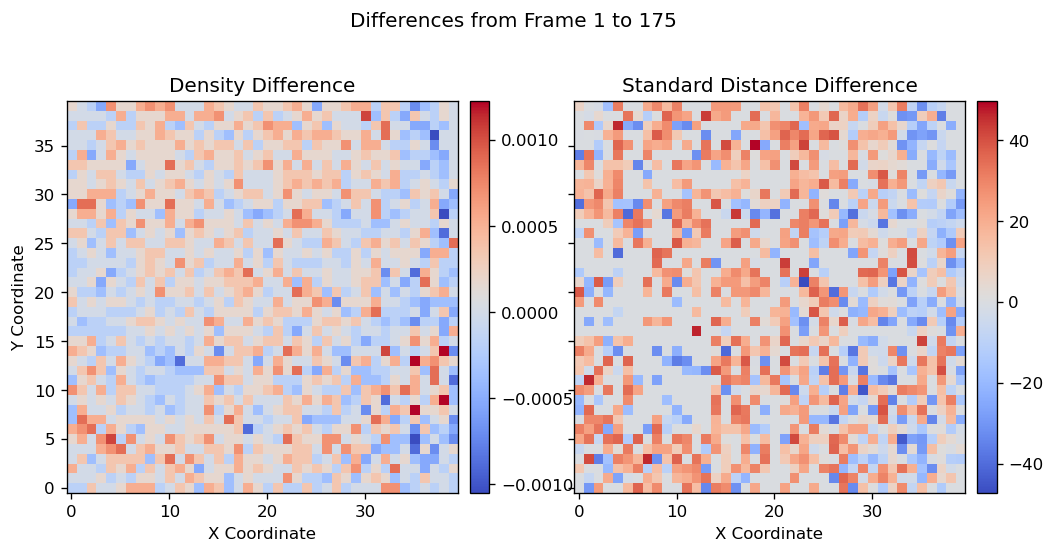

In [39]:
"""
how does the density change from t0 to t175?
"""

reload(_stat)    

SIZE = 40

    
frame1 = df[df['FRAME'] == 1]
    
dens1, mu1 = _stat.get_densities(points=frame1[['POSITION_X', 'POSITION_Y']], 
                       frame_size=FRAME_SIZE, 
                       subregion_div=(SIZE, SIZE))

frame175 = df[df['FRAME'] == 175]
    
dens175, mu175 = _stat.get_densities(points=frame175[['POSITION_X', 'POSITION_Y']], 
                       frame_size=FRAME_SIZE, 
                       subregion_div=(SIZE, SIZE))


matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (10, 8)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

im1=ax1.imshow(dens175 - dens1, interpolation='nearest', cmap='coolwarm', origin='lower')
ax1.set_title("Density Difference")
ax1.set_ylabel("Y Coordinate")
ax1.set_xlabel("X Coordinate")
divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im1, cax=cax)

im2=ax2.imshow(mu175 - mu1, interpolation='nearest', cmap='coolwarm', origin='lower')
ax2.set_title("Standard Distance Difference")
ax2.set_xlabel("X Coordinate")

plt.suptitle(f"Differences from Frame 1 to 175 ", y=0.8)

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.1)
plt.colorbar(im2, cax=cax)

/home/cstansbu/.local/lib/python3.8/site-packages/pointpats/centrography.py:229: RuntimeWarning: Mean of empty slice.
  m = points.mean(axis=0)
/home/cstansbu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:162: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(
/home/cstansbu/.local/lib/python3.8/site-packages/pointpats/centrography.py:230: RuntimeWarning: invalid value encountered in true_divide
  return np.sqrt(((points * points).sum(axis=0) / n - m * m).sum())


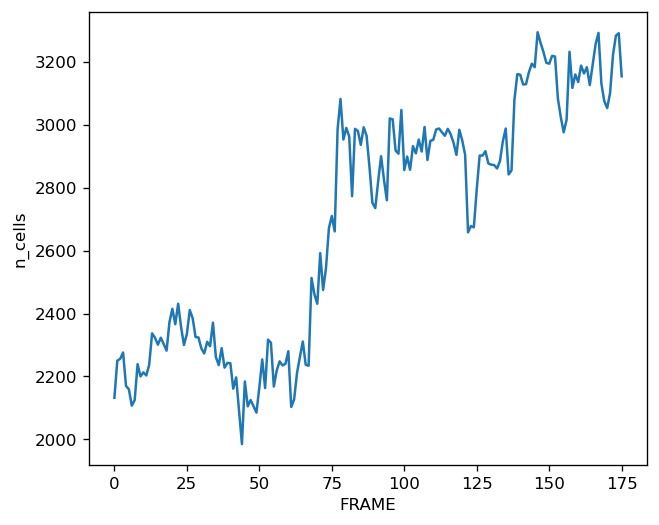

In [56]:
"""
disperion over time
"""
SIZE = 40
new_rows = []

for t in df['FRAME'].unique():
    subset = df[df['FRAME'] == t]
    
    dens, mu = _stat.get_densities(points=subset[['POSITION_X', 'POSITION_Y']], 
                                   frame_size=FRAME_SIZE, 
                                   subregion_div=(SIZE, SIZE))
    
    n = subset['TRACK_ID'].nunique()
    
    row = {
        'FRAME' : t,
        'mean_dens': np.mean(dens),
        'mean_disp': np.mean(mu),
        'std_dens': np.std(dens),
        'std_disp': np.std(mu),
        'n_cells': n
    }
    
    new_rows.append(row)
    
res = pd.DataFrame(new_rows)

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (6, 5)
sns.lineplot(data=res,
             x='FRAME',
             y='n_cells')

Text(0, 0.5, 'Est. Cell Count')

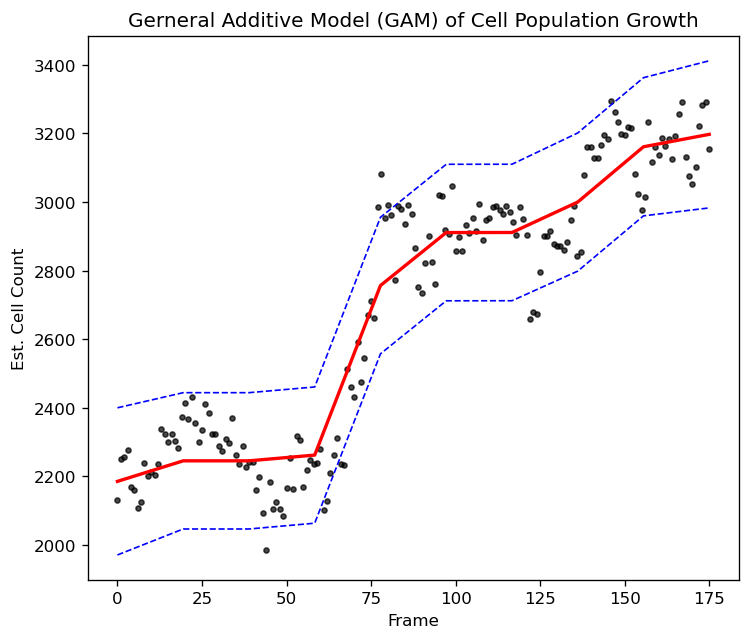

In [109]:
gam = LinearGAM(s(0), constraints='monotonic_inc').fit(res['FRAME'], res['n_cells'])
# gam.summary()

XX = gam.generate_X_grid(term=0, n=10)

pred = gam.predict(XX)
conf = gam.prediction_intervals(XX, width=.95)

matplotlib.rcParams['figure.dpi'] = 120
matplotlib.rcParams['figure.figsize'] = (7, 6)

plt.plot(XX, pred, 'r', lw=2)
plt.plot(XX, conf, color='b', ls='--', lw=1)
plt.scatter(res['FRAME'], res['n_cells'], marker=".", c='black', alpha=0.7)


plt.title("Gerneral Additive Model (GAM) of Cell Population Growth")
plt.xlabel("Frame")
plt.ylabel("Est. Cell Count")


In [ ]:
# matplotlib.rcParams['figure.dpi'] = 120
# matplotlib.rcParams['figure.figsize'] = (6, 5)
# sns.lineplot(data=res,
#              x='FRAME',
#              y='std_disp')